In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Fraud Check¶

In [2]:
df = pd.read_csv('Fraud_check.csv')

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df = pd.get_dummies(df, columns= ['Undergrad', 'Marital.Status', 'Urban'])

In [5]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [6]:
df['Taxable.Income'] = pd.cut(x = df['Taxable.Income'], bins= [10002,30000,99620], labels= ['Risky', 'Good'])

In [7]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


In [8]:
X = df.drop('Taxable.Income', axis = 1)

In [9]:
y = df['Taxable.Income']

In [10]:
X

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [11]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [12]:
n_trees = 300
max_features = 3
seeds = 7

In [13]:
kfold = KFold(n_splits=10, random_state=None)

In [14]:
model = RandomForestClassifier(n_estimators= n_trees, max_features= max_features)

In [15]:
result = cross_val_score(model, X, y, cv = kfold)

In [16]:
result.mean()

0.7316666666666667

# Company Data

In [17]:
dff = pd.read_csv('Company_Data.csv')

In [18]:
dff

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [19]:
dff.shape

(400, 11)

In [20]:
dff.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [21]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [22]:
dff[dff.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


<AxesSubplot:>

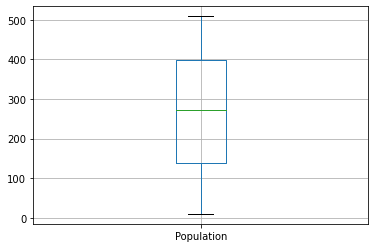

In [23]:
dff.boxplot(column= ['Population'])

In [24]:
dff[dff.isna().any(axis =1)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [25]:
dff.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [26]:
dff = pd.get_dummies(dff, columns= ['Urban', 'US', 'ShelveLoc'])

In [27]:
dff

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,0,1,0,1,1,0,0
1,11.22,111,48,16,260,83,65,10,0,1,0,1,0,1,0
2,10.06,113,35,10,269,80,59,12,0,1,0,1,0,0,1
3,7.40,117,100,4,466,97,55,14,0,1,0,1,0,0,1
4,4.15,141,64,3,340,128,38,13,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,1,0,1,0
396,6.14,139,23,3,37,120,55,11,1,0,0,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,1,0,1,0,0,1
398,5.94,100,79,7,284,95,50,12,0,1,0,1,1,0,0


In [28]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   Urban_No          400 non-null    uint8  
 9   Urban_Yes         400 non-null    uint8  
 10  US_No             400 non-null    uint8  
 11  US_Yes            400 non-null    uint8  
 12  ShelveLoc_Bad     400 non-null    uint8  
 13  ShelveLoc_Good    400 non-null    uint8  
 14  ShelveLoc_Medium  400 non-null    uint8  
dtypes: float64(1), int64(7), uint8(7)
memory usage: 27.9 KB


In [29]:
dff['Sales'].max()

16.27

In [30]:
dff['Sales'] = pd.cut(dff['Sales'], bins= [-1, 8, 17], labels= ['Bad', 'Good'])

In [31]:
dff[dff.isna().any(axis =1)]

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
dff

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,Good,138,73,11,276,120,42,17,0,1,0,1,1,0,0
1,Good,111,48,16,260,83,65,10,0,1,0,1,0,1,0
2,Good,113,35,10,269,80,59,12,0,1,0,1,0,0,1
3,Bad,117,100,4,466,97,55,14,0,1,0,1,0,0,1
4,Bad,141,64,3,340,128,38,13,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Good,138,108,17,203,128,33,14,0,1,0,1,0,1,0
396,Bad,139,23,3,37,120,55,11,1,0,0,1,0,0,1
397,Bad,162,26,12,368,159,40,18,0,1,0,1,0,0,1
398,Bad,100,79,7,284,95,50,12,0,1,0,1,1,0,0


In [34]:
X = dff.drop('Sales', axis = 1)
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,0,1,0,1,1,0,0
1,111,48,16,260,83,65,10,0,1,0,1,0,1,0
2,113,35,10,269,80,59,12,0,1,0,1,0,0,1
3,117,100,4,466,97,55,14,0,1,0,1,0,0,1
4,141,64,3,340,128,38,13,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,1,0,1,0
396,139,23,3,37,120,55,11,1,0,0,1,0,0,1
397,162,26,12,368,159,40,18,0,1,0,1,0,0,1
398,100,79,7,284,95,50,12,0,1,0,1,1,0,0


In [35]:
y = dff['Sales']
y

0      Good
1      Good
2      Good
3       Bad
4       Bad
       ... 
395    Good
396     Bad
397     Bad
398     Bad
399    Good
Name: Sales, Length: 400, dtype: category
Categories (2, object): ['Bad' < 'Good']

In [36]:
n_tree = 150
max_features = 4

In [37]:
kfold = KFold(n_splits= 10)

In [38]:
model1 = RandomForestClassifier(n_estimators= n_tree, max_features= max_features)

In [39]:
result1 = cross_val_score(model1, X, y, cv = kfold)

In [40]:
result1.mean()

0.8225